<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

pip install scikit-learn

In [272]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from src.SupportPreProcesamiento import (
    exploracion_dataframe,
    separarar_df,
    plot_numericas,
    plot_categoricas,
    relacion_vr_categoricas,
    relacion_vr_numericas,
    matriz_correlacion,
    detectar_outliers,
    diferencia_tras_rellenar_nulos
)

pd.set_option('display.float_format', '{:.2f}'.format)


# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")



# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


In [273]:
df = pd.read_csv("datos/autorenew.csv")

In [274]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.00,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.00,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.00,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.00,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.00,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


# EDA
Vamos a realizar lo siguiente mediante las funciones previamente definidas:
- explorar la info del Dataframe
- visualizar las numéricas con un histplot
- visualizar las categoricas con un countplot
- visualizar los outliers con un boxplot
- visualizar correlacion con heatmap
- visualizar categoricas vs variable respuesta(barplot)
- visualizar numericas vs variable respuesta con un (scatterplot)

### Explorar la info del Dataframe
Vamos a ver primero que datos tenemos y con que vamos a trabajar vamos a usar la funcion explorar DataFrame, usando como columna control


In [275]:
exploracion_dataframe(df,"price",estadisticos=False)

El número de datos es 371528 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.00
gearbox,5.44
model,5.51
fuelType,8.99
notRepairedDamage,19.40



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DATECRAWLED tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-26 22:57:31,6
2016-03-19 21:49:56,6
2016-03-22 10:42:10,5
2016-04-04 22:38:11,5


La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523


La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna DATECREATED tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305


La columna LASTSEEN tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-06 13:45:54,17
2016-04-07 06:45:59,17
2016-04-07 08:16:54,16
2016-04-06 09:46:00,16
2016-04-06 04:17:20,16


### Revisar tipo de nulos que tenemos

In [276]:
df[["vehicleType","gearbox","model","fuelType","notRepairedDamage"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   vehicleType        237765 non-null  object
 1   gearbox            351319 non-null  object
 2   model              351044 non-null  object
 3   fuelType           338142 non-null  object
 4   notRepairedDamage  299468 non-null  object
dtypes: object(5)
memory usage: 14.2+ MB


In [277]:
for col in df[["vehicleType","gearbox","model","fuelType","notRepairedDamage"]].columns:
    print("\n ..................... \n")
    print(f"{col}")
    display(df[col].unique())


 ..................... 

vehicleType


array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)


 ..................... 

gearbox


array(['manually', 'automatic', nan], dtype=object)


 ..................... 

model


array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       'glk', '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt',
       'impreza', 'vectra', 'berlingo', 'm_klasse', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '


 ..................... 

fuelType


array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)


 ..................... 

notRepairedDamage


array([nan, 'yes', 'no'], dtype=object)

# Conclusiones 
- Tenemos 4 Duplicados
- Tenemos 5 Columnas con nulos:
    - vehicleType: 36% nulos categórica ['nan','coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other']
    - gearbox: 5,5% nulos, categórica ['manually', 'automatic', nan]
    - model: 5,51% nulos, categórica (No la pongo que son muchos)
    - fuelType: 8,98% nulos categórica ['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro']
    - notRepairedDamage 19,39% nulos categorica [nan, 'yes', 'no']



# Las gráficas tardan mucho, porque? veamos:

In [278]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,371528.00,17295.14,3587953.74,0.00,1150.00,2950.00,7200.00,2147483647.00
yearOfRegistration,371528.00,2004.58,92.87,1000.00,1999.00,2003.00,2008.00,9999.00
powerCV,371528.00,113.97,189.52,0.00,69.00,104.00,148.00,19726.00
kilometer,371528.00,125618.69,40112.34,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,371528.00,5.73,3.71,0.00,3.00,6.00,9.00,12.00
nrOfPictures,371528.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
postalCode,371528.00,50820.67,25799.08,1067.00,30459.00,49610.00,71546.00,99998.00


Si miramos el valor máximo, de las columnas, no tiene sentido ni para price, ni yearof, ni powerCV, ni postal code, pero sobre todo vamos a limpiar nuestro DF, number of pictures no nos interesa, si siempre es 0, no afectara

Postal code nos puede interesar

Dropeamos nrOfPictures

In [279]:
df.drop(columns="nrOfPictures",inplace=True)
df.sample()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
101484,2016-03-31 13:46:55,Ford_Fiesta_Kastenwagen,private,offer,1800,control,combi,2006,manually,67.00,fiesta,150000,5,diesel,ford,NaN,2016-03-31 00:00:00,80331,2016-04-06 06:17:22


### Veamos ahora price

In [280]:
df["price"].nlargest(100).unique()

array([2147483647,   99999999,   99000000,   74185296,   32545461,
         27322222,   14000500,   12345678,   11111111,   10010011,
         10000000,    9999999,    3895000,    3890000,    2995000,
          2795000,    1600000,    1300000,    1250000,    1234566,
          1111111,    1010010,    1000000,     999999,     999990,
           911911,     849000,     820000,     780000,     745000,
           725000,     700000,     650000,     619000,     600000,
           599000,     585000,     579000,     517895])

Con precios tan elevados y totalmente surrealistas, vamos a poner como nulos aquellos mayores a 3.895.000, y vamos también a poner como nulos [999999, 999990,1010010,1234566,1111111,911911] la razón son precios anormales, posiblemente errores o manera del usuario de negociar el precio por privado, sea la razón que sea, el número de datos afectado es pequeño y nos permitirá obtener datos más realistas

In [281]:
cond1 = df["price"] > 3895000
df.loc[cond1, "price"] = np.nan

In [282]:
atipicos = [999999, 999990,1010010,1234566,1111111,911911]
for ati in atipicos:
    condicion = df["price"] == ati
    df.loc[condicion,"price"] == np.nan

In [283]:
df["price"].nlargest()

366861   3895000.00
364171   3890000.00
41980    2995000.00
45055    2795000.00
333699   1600000.00
Name: price, dtype: float64

y ahora cual es el precio más bajo? Si es menos de 150 es nulo el precio

In [284]:
condicion = df["price"] < 150
df.loc[condicion,"price"] = np.nan

Con esto ya tenemos un rango de precios más adecuado

### YearofRegistration
Con el año de registro es fácil, si es mayor de 2024, es nulo

In [285]:
cond = df["yearOfRegistration"] > 2024
df.loc[cond,"yearOfRegistration"] = np.nan


y claro, el coche se invento en 1886, si es menor de eso es NAN

In [286]:
cond = df["yearOfRegistration"] < 1886
df.loc[cond,"yearOfRegistration"] = np.nan

### Month
Verifiquemos que hay

In [287]:
df["monthOfRegistration"].unique()

array([ 0,  5,  8,  6,  7, 10, 12, 11,  2,  3,  1,  4,  9])

El mes no nos va a aportar nada de valor tampoco, no me lo voy a cargar, pero si que voy a no tenerlo en cuenta

### PowerCV
un coche no puede tener menos de 5 CV, ni más de 1600 CV, asi que todo lo que se salga de rango, lo dejamos en NAN

In [288]:
cond = df["powerCV"] > 1600
df.loc[cond,"powerCV"] = np.nan

In [289]:
cond = df["powerCV"] < 5
df.loc[cond,"powerCV"] = np.nan

# Postal code
Considero que no la vamos a usar, ademas considero que es una variable categórica

In [290]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,356539.00,6138.49,18281.53,150.00,1300.00,3150.00,7500.00,3895000.00
yearOfRegistration,371346.00,2003.35,7.78,1910.00,1999.00,2003.00,2008.00,2019.00
powerCV,330442.00,124.73,66.04,5.00,79.00,114.00,148.00,1578.00
kilometer,371528.00,125618.69,40112.34,5000.00,125000.00,150000.00,150000.00,150000.00
monthOfRegistration,371528.00,5.73,3.71,0.00,3.00,6.00,9.00,12.00
postalCode,371528.00,50820.67,25799.08,1067.00,30459.00,49610.00,71546.00,99998.00


In [291]:
df["kilometer"].isna().value_counts()

kilometer
False    371528
Name: count, dtype: int64

# ¿Con que columnas numéricas vamos a trabajar?
- price
- yearOfRegistration
- powerCV
- Kilometer, que por como es la volveremos categórica

Considero que el resto de columnas no aportan valor 

# Columnas categóricas
Ahora vamos a ver con que columnas categóricas nos quedamos y como gestionamos sus nulos

In [292]:
df.select_dtypes(include="O").head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,test,NaN,manually,golf,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,test,coupe,manually,NaN,diesel,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,test,suv,automatic,grand,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,test,small car,manually,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,test,small car,manually,fabia,diesel,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21


In [293]:
df.select_dtypes(include="O").columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType',
       'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen'],
      dtype='object')

### Columnas categóricas que tienen que ver con el precio:
- offerType
- vehicleType
- gearbox
- fuelType
- brand
- notRepairedDamage
- seller

De estás veamos si se pueden usar

In [294]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

In [295]:
df["gearbox"].unique()

array(['manually', 'automatic', nan], dtype=object)

In [296]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

In [297]:
df["brand"].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet',
       'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar',
       'daewoo', 'rover', 'land_rover', 'lada'], dtype=object)

In [298]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

In [299]:
df["seller"].unique()

array(['private', 'commercial'], dtype=object)

In [300]:
df["offerType"].unique()

array(['offer', 'request'], dtype=object)

Podemos usarlas, vamos a crear un nuevo Dataframe con las columnas que usaremos, numericas y categóricas

In [301]:
df_old = df

In [302]:
df = df[["seller","offerType","brand","vehicleType","fuelType","gearbox","notRepairedDamage","kilometer","powerCV","price","yearOfRegistration"]]
df["kilometer"] = df["kilometer"].astype("O")
df

,seller,offerType,brand,vehicleType,fuelType,gearbox,notRepairedDamage,kilometer,powerCV,price,yearOfRegistration
0,private,offer,volkswagen,NaN,petrol,manually,NaN,150000,NaN,480.00,1993.00
1,private,offer,audi,coupe,diesel,manually,yes,125000,187.00,18300.00,2011.00
2,private,offer,jeep,suv,diesel,automatic,NaN,125000,161.00,9800.00,2004.00
3,private,offer,volkswagen,small car,petrol,manually,no,150000,74.00,1500.00,2001.00
4,private,offer,skoda,small car,diesel,manually,no,90000,68.00,3600.00,2008.00
...,...,...,...,...,...,...,...,...,...,...,...
371523,private,offer,sonstige_autos,NaN,NaN,NaN,NaN,20000,NaN,2200.00,2005.00
371524,private,offer,smart,convertible,petrol,automatic,no,125000,100.00,1199.00,2000.00
371525,private,offer,volkswagen,bus,diesel,manually,no,150000,101.00,9200.00,1996.00
371526,private,offer,volkswagen,combi,diesel,manually,NaN,150000,99.00,3400.00,2002.00


Este es el Df con el que voy a trabajar ahora, vamos a visualizar los datos ahora que ya hemos corregido los valores numéricos y los hemos pasado a NAN si eran datos que no tenían ningún sentido

### Visualizar las numéricas con un histplot


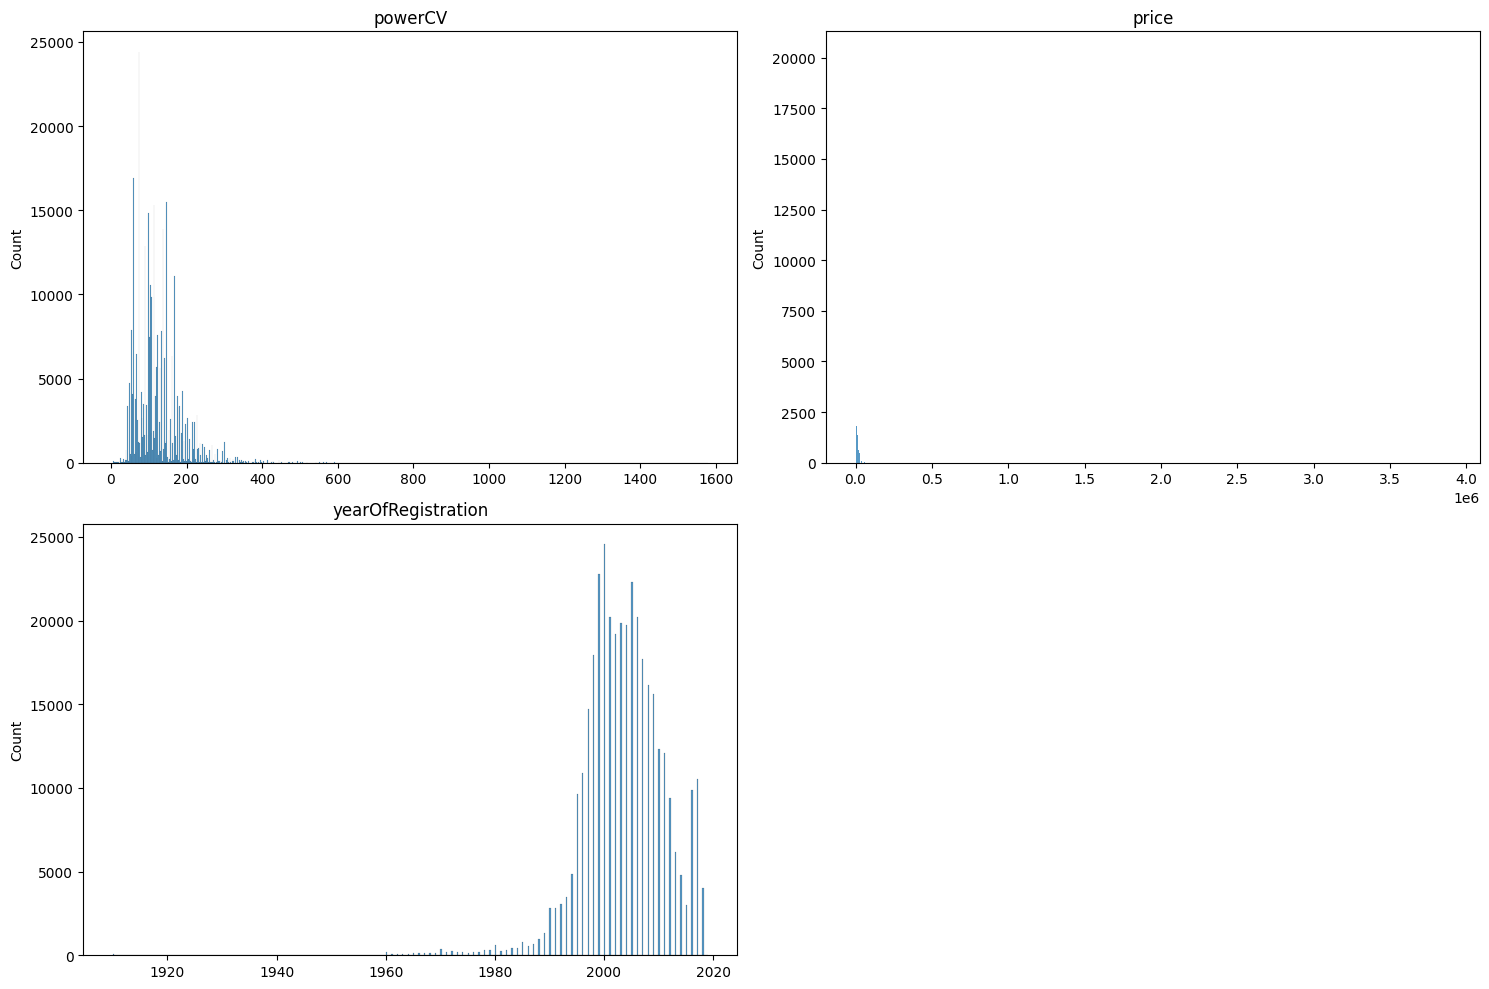

In [303]:
numericas, categoricas = separarar_df(df)
plot_numericas(numericas)

# Sobre la gráfica
Así de primeras podemos decir que la gran mayoría de los coches se encuentran alrededor de los 90 y los 2000, que la potencia se encuentra entre los 100 y 200 CV mayoritariamente y que el precio tiene muchos outliers
- En general hay bastantes outliers, pero son manejables

### Visualizar las categoricas con un countplot


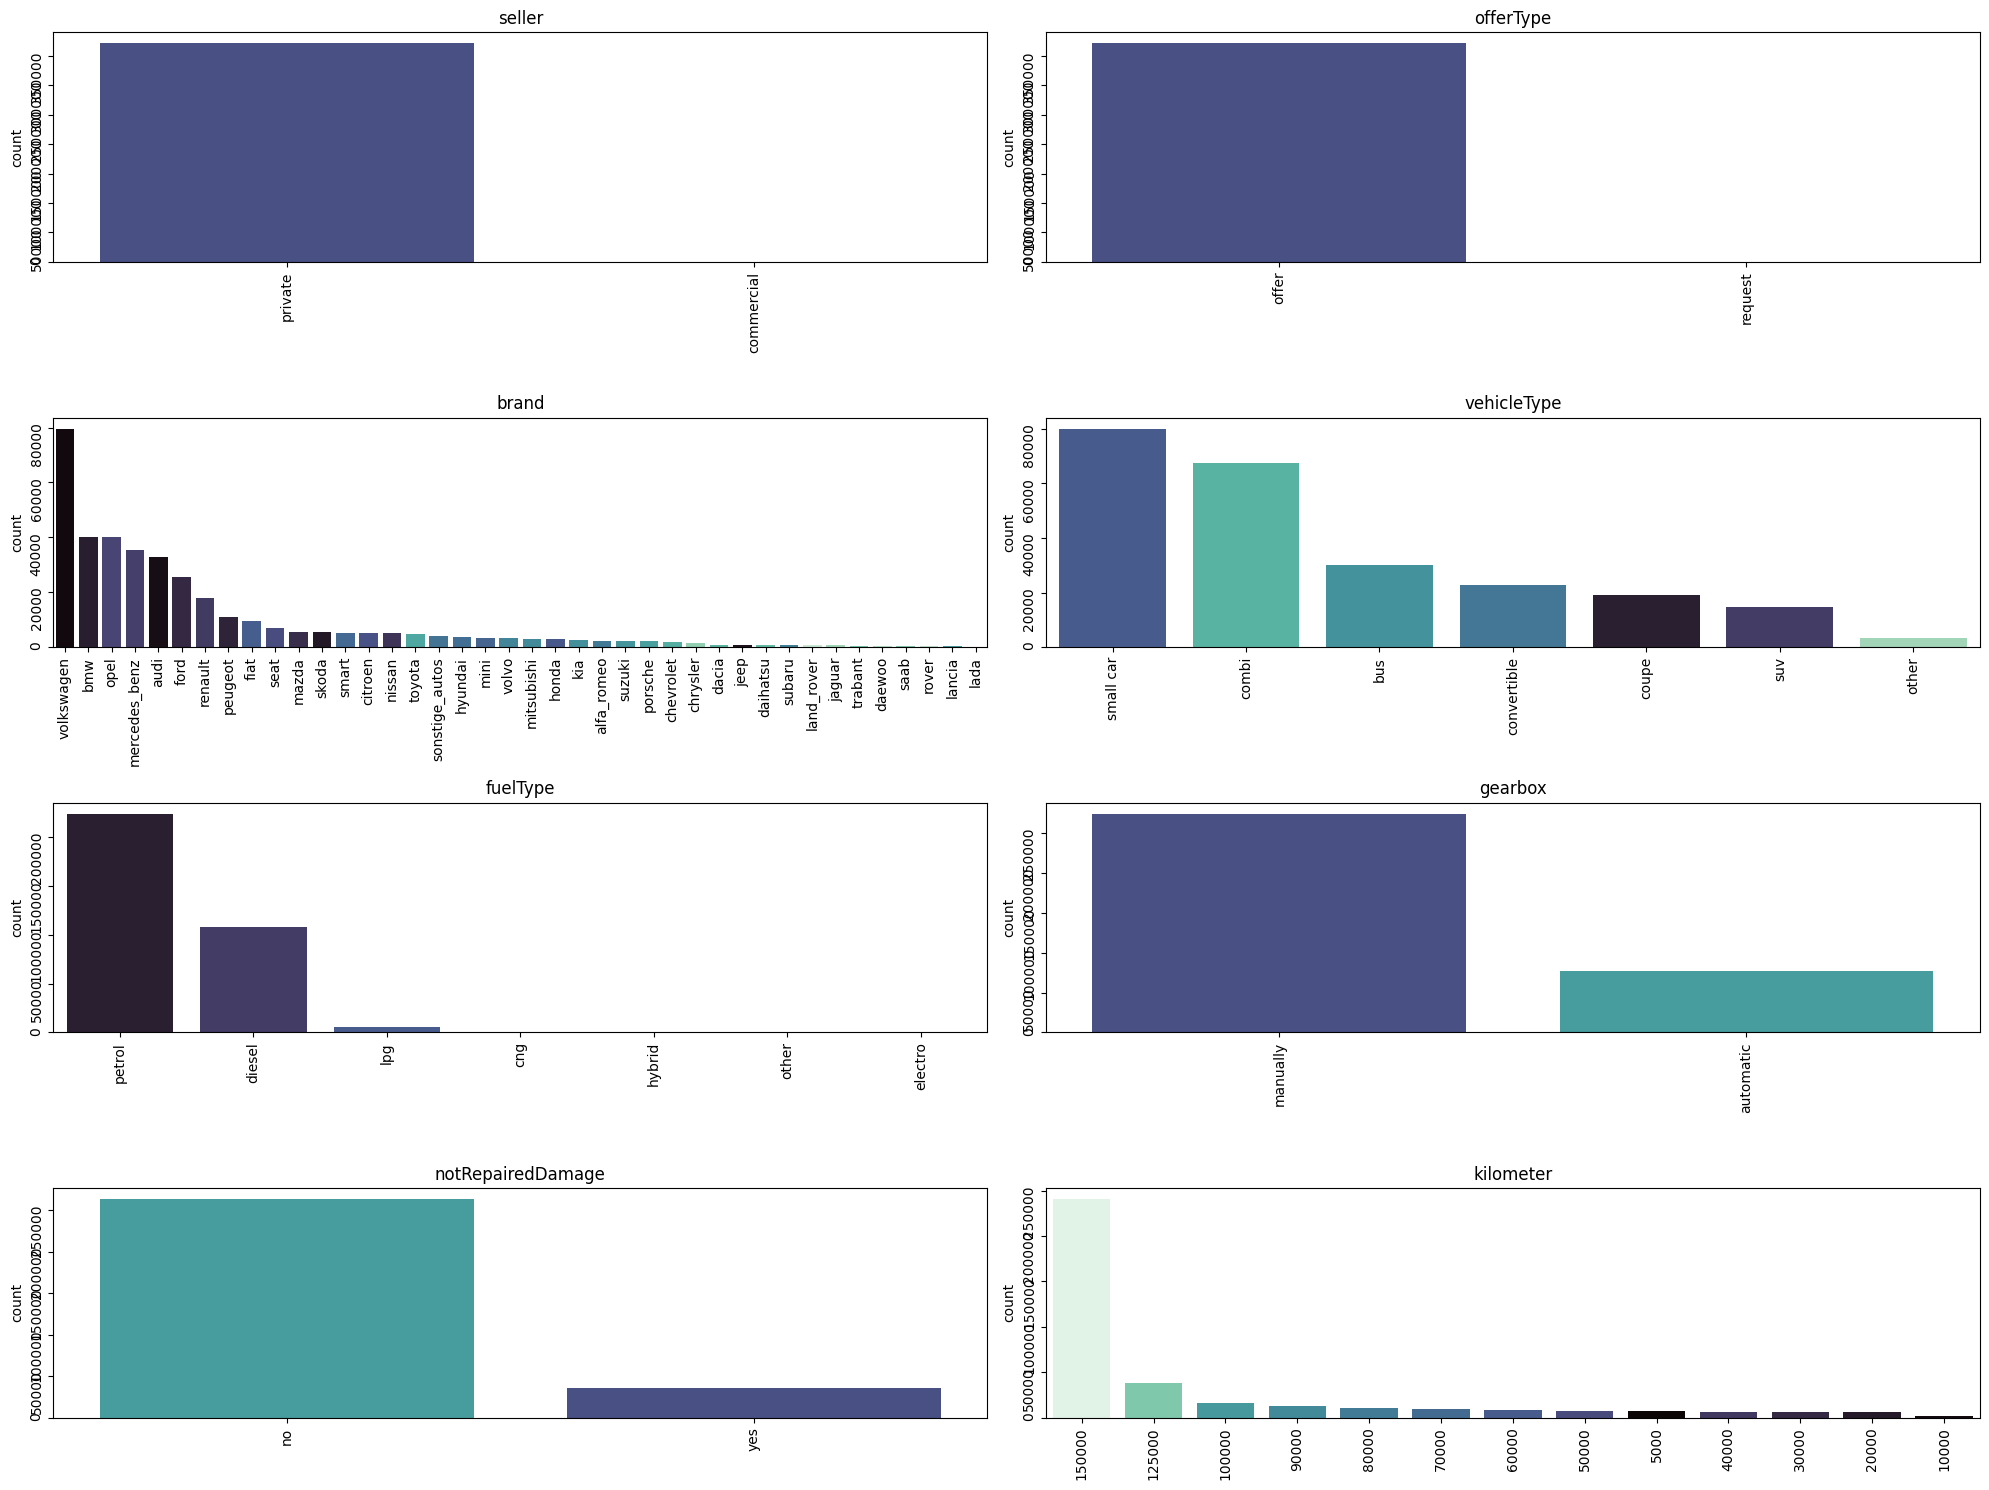

In [304]:
plot_categoricas(categoricas,grafica_size=(20,15))

# Sobre la gráfica
- Mayoritariamente los seller son privados
- Mayoritariamente son ventas, no subastas
- La marca más anunciada es volkswagen
- El tipo de vehiculo más anunciado es small car
- Los más anunciados son coches gasolina
- La caja de cambios más anunciada es la manual
- La gran mayoría de los coches no tienen daños
- La mayoría de los coches tienen 150000 km

### Visualizar los outliers con un boxplot


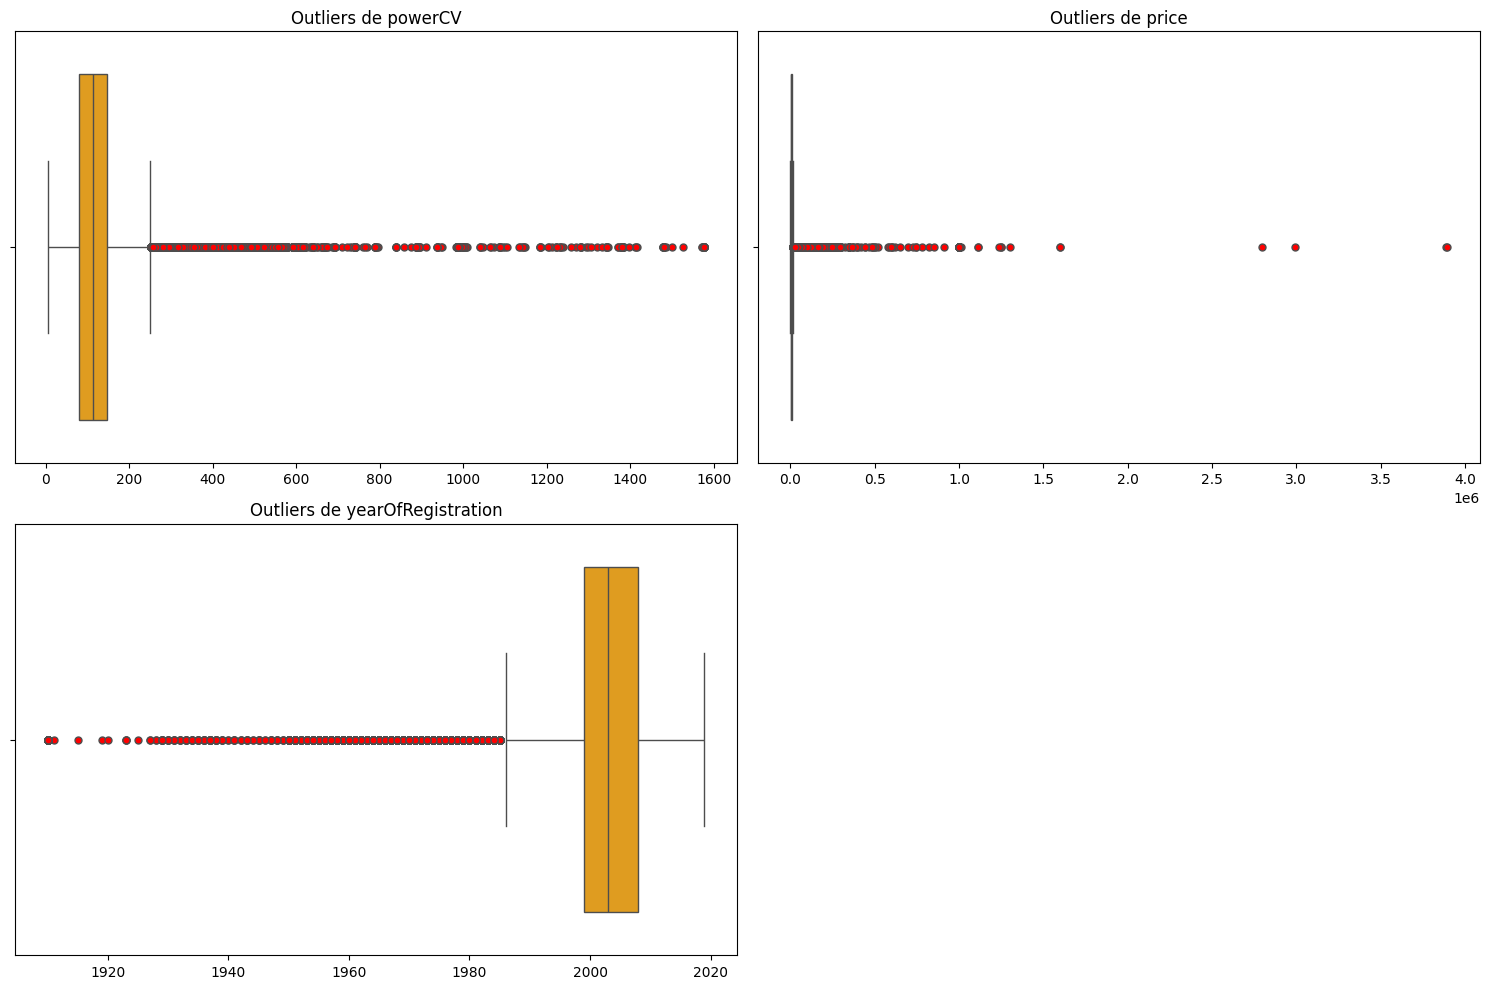

In [305]:
detectar_outliers(df)

# Sobre la gráfica
- Tenemos bastantantes outliers en todas las gráficas
- Hay que tener en cuenta que no todos los coches son iguales así que no tienen porque ser valores incorrectos (que lo pueden ser)
- El más preocupante diría que es precio con outliers tan elevados, aunque aún queda corregir nulos

La realidad es que buscamos hacer una predicción de los precios, deberíamos ver cuantos coches tenemos de más de 1.5 millones de euros, y valorar eliminarlos.

### Visualizar correlacion con heatmap


Aquí vamos a realizar dos, una del df original y otra del df tal y como está ahora, para asegurarnos de que no hemos perdido nada importante

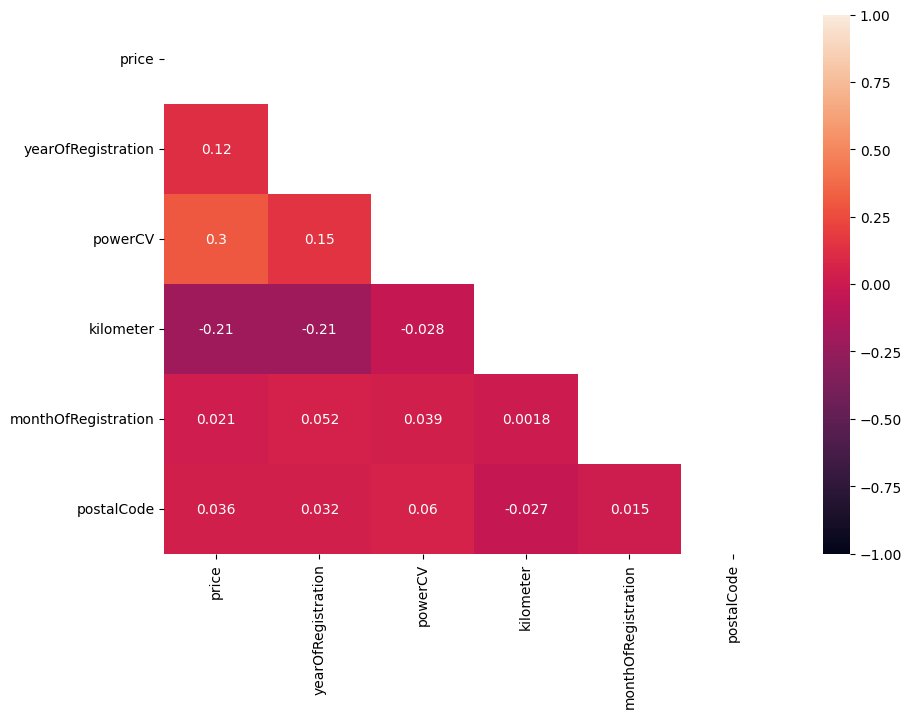

In [306]:
matriz_correlacion(df_old)

# Sobre la Gráfica
- Mayores correlaciones:
    - powerCV con price: 0.3
    - kilometer con price: 0.21
    - kilometer con yearofRegistration: 0.21 pero ahora es categórica,
    - yearofregist con Price: 0.12
    - powerCV con yearofRegistration: 0.15

    La correlación es baja, pero estás son las más altas, realmente deberíamos añadir los kilómetros (aqui me vuelvo a corregir eso)

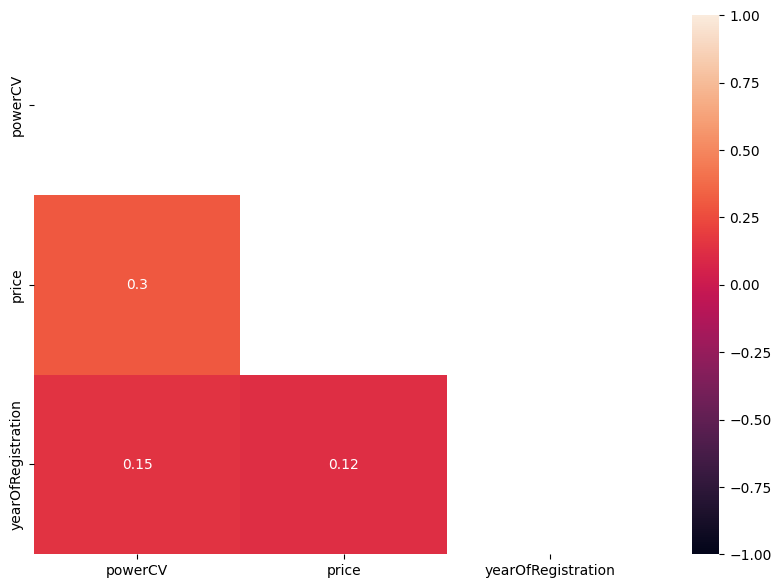

In [307]:
matriz_correlacion(df)

# Sobre la gráfica
- Viendo la anterior, hemos hecho bien, nos hemos quedado con los valores más correlacionados entre sí

### Visualizar categoricas vs variable respuesta(barplot)


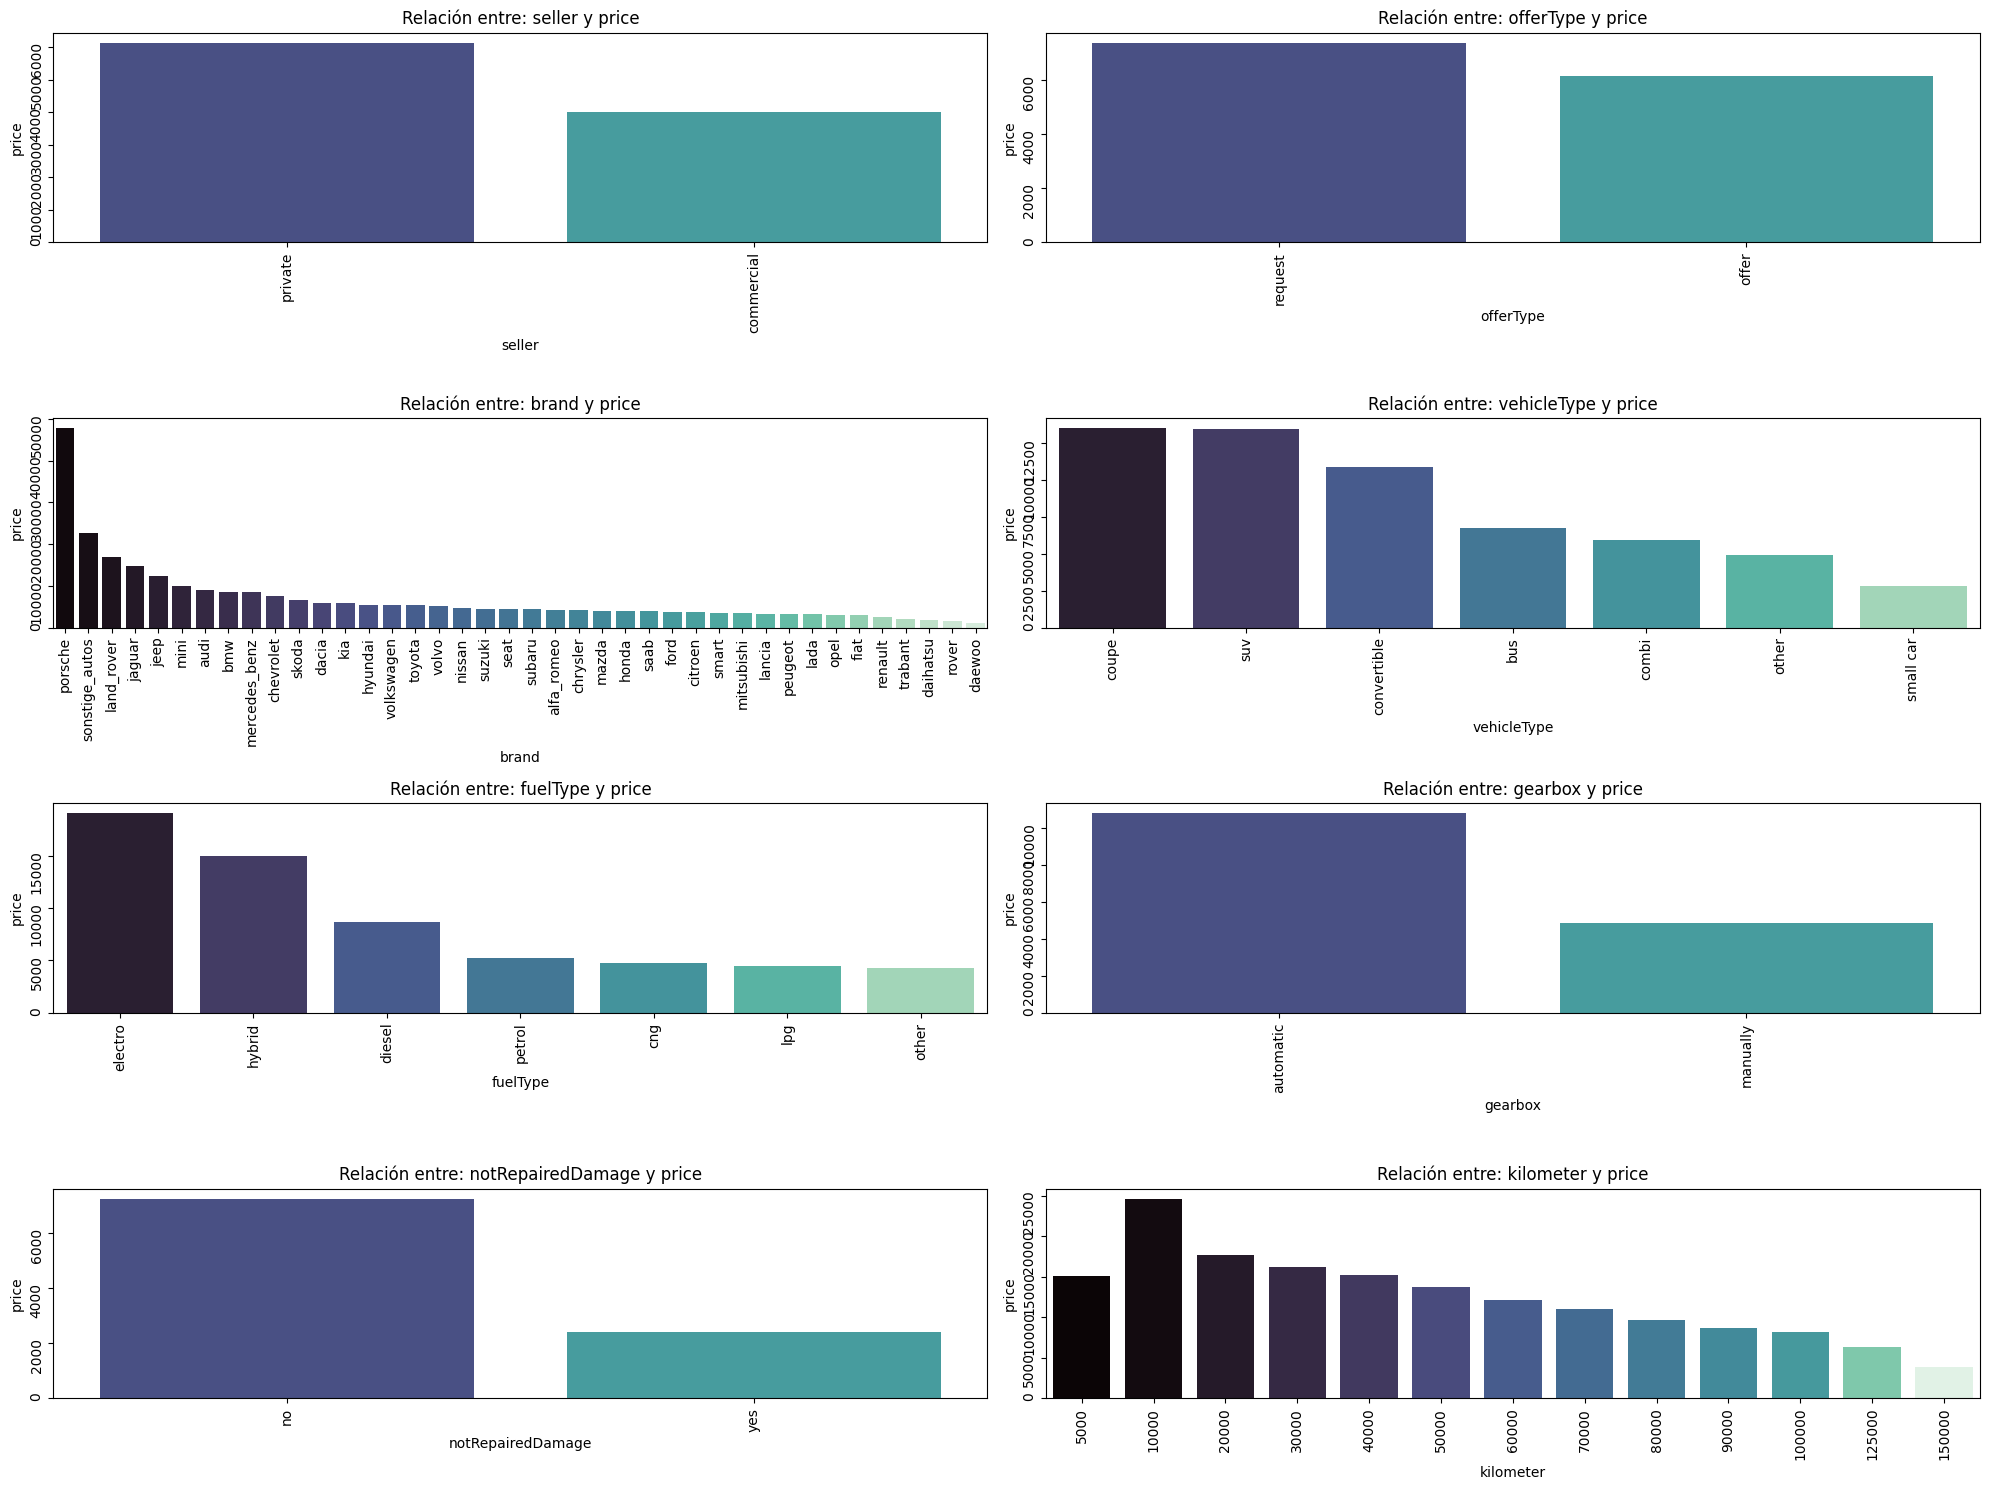

In [308]:
relacion_vr_categoricas(df,"price",grafica_size=(20,15))

# Sobre la gráfica
- El precio parece ser menor en promedio en las ventas de comercial, los privados sacan mças de promedio
- Las subastas sacan de promedio más dinero
- Porsche es el vehículo de promedio más caro | daewoo, rover, trabant... son de las más baratas.
- Los coupé y suvs son los más caros, small car el más barato.
- Los vehículos electrícos, híbridos y diesel los más caros, gasolina, cng y lpg son más baratos.
- Los automáticos son más caros que los manuales ( y menos divertidos).
- Los vehículos con daños sin reparar son mucho más baratos
- Los vehículos de 5000 km son más baratos que los de 10.000,20.000... revisar nulos


### Visualizar numericas vs variable respuesta con un (scatterplot)

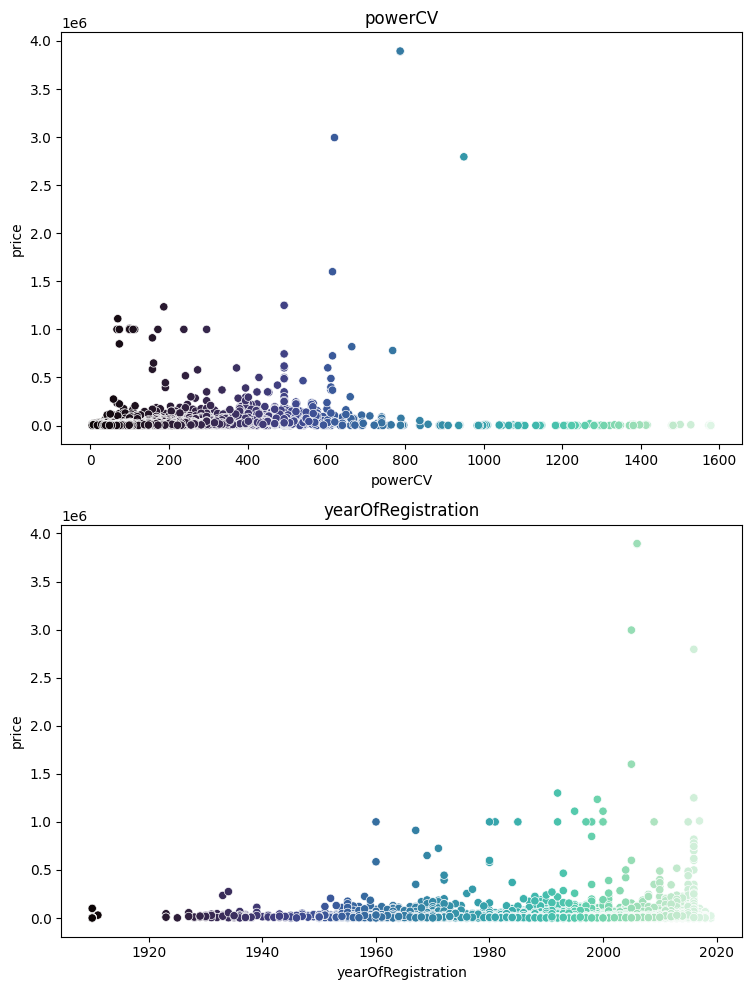

In [309]:
relacion_vr_numericas(df,"price")

# Sobre la gráfica

- La mayoría de los coches tienen entre 0 y 400 CV de potencia
- outliers con coches de 800 CV, deberían ser de lujo o superdeportivos
- Los vehiculos de más de 1000CV tienen precios demasiado bajos esto nos dice que lo más probable es que sean datos erróneos

- La mayoría de los coches están entre los 90 y 2020
- Los vehículos de antes podrían ser vehículos de colección
- Según pasa el tiempo los coches cuestan más esto tiene sentido según la depreciación natural de los vehículos

2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

Ahora vamos a rellenar nulos!, pero también voy a realizar una acción sobre el precio en base al análisis anterior:
- Voy a pasar a nulo el precio de aquellos coches que valgan más de 1.5 Millones y de más de 850 CV
- ¿Porque? Viendo las gráficas, resulta que los vehículos con más CV son baratos, no tiene sentido absoluto, por lo volviendolos nulos, podremos realizar una estimación más realista.

In [310]:
condicion = df["price"] > 1500000
df.loc[condicion,"price"] = np.nan

In [311]:
cond = df["powerCV"] > 850
df[cond]["brand"].unique()

array(['toyota', 'mitsubishi', 'opel', 'honda', 'ford', 'seat', 'nissan',
       'lancia', 'volvo', 'peugeot', 'sonstige_autos', 'citroen', 'audi',
       'volkswagen', 'kia', 'fiat', 'bmw', 'renault', 'mercedes_benz',
       'mazda', 'skoda', 'mini', 'smart', 'daewoo', 'hyundai'],
      dtype=object)

Son todo marcas que no han tenido esa potencia nunca (salvando mercedes,audi y bmw)

In [312]:
condicion = df["powerCV"] > 850
c2 = df["brand"] != "bmw"
c3 = df["brand"] != "audi"
c4 = df["brand"] != "mercedes_benz"
df.loc[condicion & c2 & c3 & c4,"powerCV"] = np.nan


Ahora que ya hemos reducido los outliers excesivos, podemos empezar a trabajar los nulos

# Columnas categóricas

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              371528 non-null  object 
 1   offerType           371528 non-null  object 
 2   brand               371528 non-null  object 
 3   vehicleType         237765 non-null  object 
 4   fuelType            338142 non-null  object 
 5   gearbox             351319 non-null  object 
 6   notRepairedDamage   299468 non-null  object 
 7   kilometer           371528 non-null  object 
 8   powerCV             330316 non-null  float64
 9   price               356533 non-null  float64
 10  yearOfRegistration  371346 non-null  float64
dtypes: float64(3), object(8)
memory usage: 31.2+ MB


In [314]:
exploracion_dataframe(df,"price")

El número de datos es 371528 y el de columnas es 11

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 54801

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.00
fuelType,8.99
gearbox,5.44
notRepairedDamage,19.40
powerCV,11.09
price,4.04
yearOfRegistration,0.05



 ..................... 

Los tipos de las columnas son:


,tipo_dato
seller,object
offerType,object
brand,object
vehicleType,object
fuelType,object
gearbox,object
notRepairedDamage,object
kilometer,object
powerCV,float64
price,float64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna KILOMETER tiene las siguientes valore únicos:


,count
kilometer,
150000,240797
125000,38067
100000,15920
90000,12523
80000,11053


Para ver si han cambiado los datos, vamos a guardar el df aquí

In [ ]:
df_before = df.copy()

# Columnas Nulas
- vehicleType : Categórica
- fuelType	: Categórica
- gearbox : Categórica
- notRepairedDamage	: Categórica


### Vehicle Type

In [316]:
df["vehicleType"].unique()

array([nan, 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi',
       'other'], dtype=object)

Para la primera pondremos los nan en "other"

In [317]:
df["vehicleType"] = df["vehicleType"].fillna("other")
df["vehicleType"].unique()

array(['other', 'coupe', 'suv', 'small car', 'convertible', 'bus',
       'combi'], dtype=object)

### Fuel Type

In [318]:
df["fuelType"].unique()

array(['petrol', 'diesel', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electro'], dtype=object)

Para fuel pondremos los nan en "other"

In [319]:
df["fuelType"] = df["fuelType"].fillna("other")
df["fuelType"].unique()

array(['petrol', 'diesel', 'other', 'lpg', 'hybrid', 'cng', 'electro'],
      dtype=object)

### Gearbox

In [320]:
df["gearbox"].unique()

array(['manually', 'automatic', nan], dtype=object)

Lo pondremos como unknown

In [321]:
df["gearbox"] = df["gearbox"].fillna("unknown")
df["gearbox"].unique()

array(['manually', 'automatic', 'unknown'], dtype=object)

### Not Repaired Damage

In [322]:
df["notRepairedDamage"].unique()

array([nan, 'yes', 'no'], dtype=object)

Lo pondremos como unknown

In [323]:
df["notRepairedDamage"] = df["notRepairedDamage"].fillna("unknown")
df["notRepairedDamage"].unique()

array(['unknown', 'yes', 'no'], dtype=object)

Hagamos dos dataframes para ver que metodo de imputación funciona mejor

In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
df_previo = df.copy()

# Columnas numéricas
### Nulas
- powerCV	: numérica
- price	: numérica
- yearOfRegistration : numérica

Veamos información sobre los mismos:


In [331]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
powerCV,330316.00,124.33,62.60,5.00,79.00,114.00,148.00,1578.00
price,356533.00,6091.54,13724.79,150.00,1300.00,3150.00,7500.00,1300000.00
yearOfRegistration,371346.00,2003.35,7.78,1910.00,1999.00,2003.00,2008.00,2019.00


Realizamos el KNN Imputer

In [332]:
df_num = df1.select_dtypes(include=np.number)
imputer_knn = KNNImputer(n_neighbors=5)
knn_imputado = imputer_knn.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(knn_imputado,columns=df_num.columns)
df_knn = df1.copy()
df1[df_num.columns] = df_num_sin_nulos
df1.isnull().sum()


seller                0
offerType             0
brand                 0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
dtype: int64

Tarda 18 Minutos

Ahora hacemos el Iterative

In [335]:
df_num = df2.select_dtypes(include=np.number)
imputer_iterative = IterativeImputer(max_iter=20,random_state=42)
iterative_imputado = imputer_iterative.fit_transform(df_num)
df_num_sin_nulos = pd.DataFrame(knn_imputado,columns=df_num.columns)
df_iterative = df2.copy()
df2[df_num.columns] = df_num_sin_nulos
df2.isnull().sum()

seller                0
offerType             0
brand                 0
vehicleType           0
fuelType              0
gearbox               0
notRepairedDamage     0
kilometer             0
powerCV               0
price                 0
yearOfRegistration    0
dtype: int64

# Comparamos métodos

### KNN 

In [334]:
df_previo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              371528 non-null  object 
 1   offerType           371528 non-null  object 
 2   brand               371528 non-null  object 
 3   vehicleType         371528 non-null  object 
 4   fuelType            371528 non-null  object 
 5   gearbox             371528 non-null  object 
 6   notRepairedDamage   371528 non-null  object 
 7   kilometer           371528 non-null  object 
 8   powerCV             371528 non-null  float64
 9   price               371528 non-null  float64
 10  yearOfRegistration  371528 non-null  float64
dtypes: float64(3), object(8)
memory usage: 31.2+ MB


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              371528 non-null  object 
 1   offerType           371528 non-null  object 
 2   brand               371528 non-null  object 
 3   vehicleType         371528 non-null  object 
 4   fuelType            371528 non-null  object 
 5   gearbox             371528 non-null  object 
 6   notRepairedDamage   371528 non-null  object 
 7   kilometer           371528 non-null  object 
 8   powerCV             371528 non-null  float64
 9   price               371528 non-null  float64
 10  yearOfRegistration  371528 non-null  float64
dtypes: float64(3), object(8)
memory usage: 31.2+ MB


In [267]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   seller              371528 non-null  object 
 1   offerType           371528 non-null  object 
 2   brand               371528 non-null  object 
 3   vehicleType         371528 non-null  object 
 4   fuelType            371528 non-null  object 
 5   gearbox             371528 non-null  object 
 6   notRepairedDamage   371528 non-null  object 
 7   kilometer           371528 non-null  object 
 8   powerCV             371528 non-null  float64
 9   price               371528 non-null  float64
 10  yearOfRegistration  371528 non-null  float64
dtypes: float64(3), object(8)
memory usage: 31.2+ MB


In [336]:
diferencia_tras_rellenar_nulos(df1,df2)


 ..................... 

Estadísticas antes de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,371528.00,122.97,60.15,5.00,81.00,113.00,148.00,1578.00
price,371528.00,6006.67,13572.72,150.00,1299.00,3000.00,7400.00,1300000.00
yearOfRegistration,371528.00,2003.35,7.78,1910.00,1999.00,2003.00,2008.00,2019.00



 ..................... 

Estadísticas después de la operación:


,count,mean,std,min,25%,50%,75%,max
powerCV,371528.00,122.97,60.15,5.00,81.00,113.00,148.00,1578.00
price,371528.00,6006.67,13572.72,150.00,1299.00,3000.00,7400.00,1300000.00
yearOfRegistration,371528.00,2003.35,7.78,1910.00,1999.00,2003.00,2008.00,2019.00



 ..................... 

Diferencia porcentual:


,count,mean,std,min,25%,50%,75%,max
powerCV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
price,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
yearOfRegistration,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


![image.png](src/01.png)